### Imports And Data Loading

In [1]:
import pandas as pd
import seaborn as sns
sns.set(context="notebook", style="whitegrid", font_scale=1.2)

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
recording_raw = pd.read_csv("lsl-recording.csv")
recording_raw.head()

recording_filtered = recording_raw[recording_raw.confidence > 0.6]

### Gaze Distribution

In [3]:
def scatter_gaze_positions(data, color_key):
    points = plt.scatter(
        x="norm_pos_x",
        y="norm_pos_y",
        c=color_key,
        cmap="BuGn",
        alpha=0.5,
        data=data
    )
    cbar = plt.colorbar(points)
    cbar.ax.set_ylabel(color_key, rotation=270)
    cbar.ax.get_yaxis().labelpad = 15

    plt.xlabel("norm_pos_x")
    plt.ylabel("norm_pos_y")
    plt.xlim([0,1])
    plt.ylim([0,1])

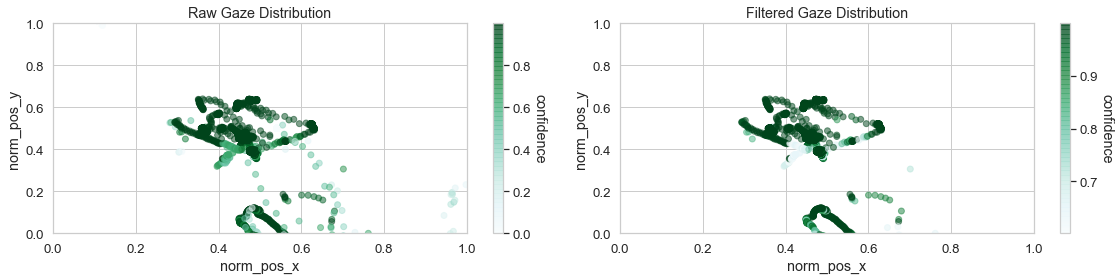

In [4]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.title("Raw Gaze Distribution")
scatter_gaze_positions(recording_raw, "confidence")

plt.subplot(1, 2, 2)
plt.title("Filtered Gaze Distribution")
scatter_gaze_positions(recording_filtered, "confidence")

plt.tight_layout()

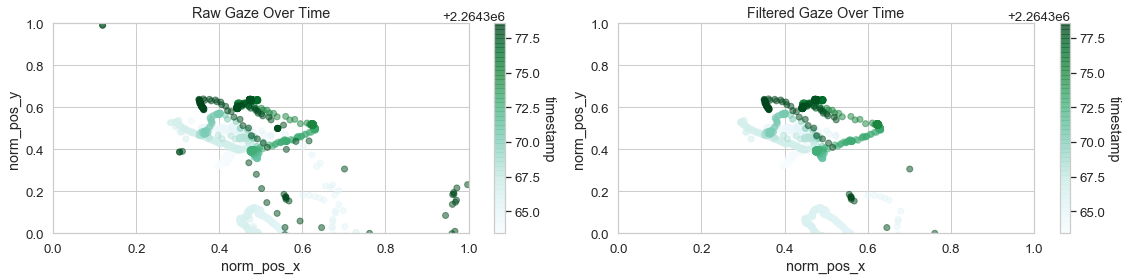

In [6]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.title("Raw Gaze Over Time")
scatter_gaze_positions(recording_raw, "timestamp")

plt.subplot(1, 2, 2)
plt.title("Filtered Gaze Over Time")
scatter_gaze_positions(recording_filtered, "timestamp")

plt.tight_layout()

### Diameter Over Time

In [9]:
def plot_diameter_setup(unit):
    plt.xlabel("Time [seconds]")
    plt.ylabel("Diameter [{}]".format(unit))

def plot_diameter_2d(data):
    plt.title("Diameter 2d Over Time")
    plt.plot(data.timestamp, data.diameter0_2d, label="eye0")
    plt.plot(data.timestamp, data.diameter1_2d, label="eye1")
    plot_diameter_setup(unit="pixel")
    
def plot_diameter_3d(data):
    plt.title("Diameter 3d Over Time")
    plt.plot(data.timestamp, data.diameter0_3d, label="eye0")
    plt.plot(data.timestamp, data.diameter1_3d, label="eye1")
    plot_diameter_setup(unit="mm")
    

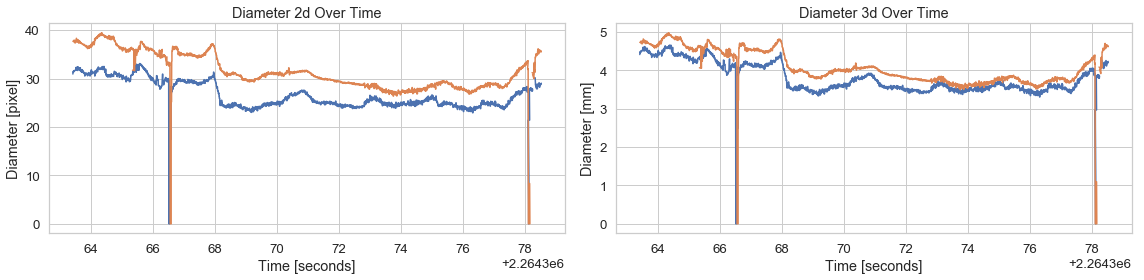

In [11]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plot_diameter_2d(recording_raw)

plt.subplot(1, 2, 2)
plot_diameter_3d(recording_raw)

plt.tight_layout()